In [1]:
#https://www.kaggle.com/pmarcelino/data-analysis-and-feature-extraction-with-python

# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Put this when it's called
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [2]:
# Create table for missing data analysis
def draw_missing_data_table(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

# Plot learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Validation score")

    plt.legend(loc="best")
    return plt

# Plot validation curve
def plot_validation_curve(estimator, title, X, y, param_name, param_range, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    train_scores, test_scores = validation_curve(estimator, X, y, param_name, param_range, cv)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    plt.plot(param_range, train_mean, color='r', marker='o', markersize=5, label='Training score')
    plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.15, color='r')
    plt.plot(param_range, test_mean, color='g', linestyle='--', marker='s', markersize=5, label='Validation score')
    plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha=0.15, color='g')
    plt.grid() 
    plt.xscale('log')
    plt.legend(loc='best') 
    plt.xlabel('Parameter') 
    plt.ylabel('Score') 
    plt.ylim(ylim)


In [4]:
#load training data
df_train = pd.read_csv('../data/raw/train.csv')
#check columns type
df_train.dtypes

Id                       int64
Product_Info_1           int64
Product_Info_2          object
Product_Info_3           int64
Product_Info_4         float64
Product_Info_5           int64
Product_Info_6           int64
Product_Info_7           int64
Ins_Age                float64
Ht                     float64
Wt                     float64
BMI                    float64
Employment_Info_1      float64
Employment_Info_2        int64
Employment_Info_3        int64
Employment_Info_4      float64
Employment_Info_5        int64
Employment_Info_6      float64
InsuredInfo_1            int64
InsuredInfo_2            int64
InsuredInfo_3            int64
InsuredInfo_4            int64
InsuredInfo_5            int64
InsuredInfo_6            int64
InsuredInfo_7            int64
Insurance_History_1      int64
Insurance_History_2      int64
Insurance_History_3      int64
Insurance_History_4      int64
Insurance_History_5    float64
                        ...   
Medical_Keyword_20       int64
Medical_

C:\Users\xianf\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


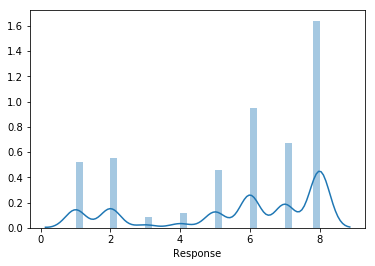

In [5]:
#training data response plot
sns.distplot(df_train['Response']);

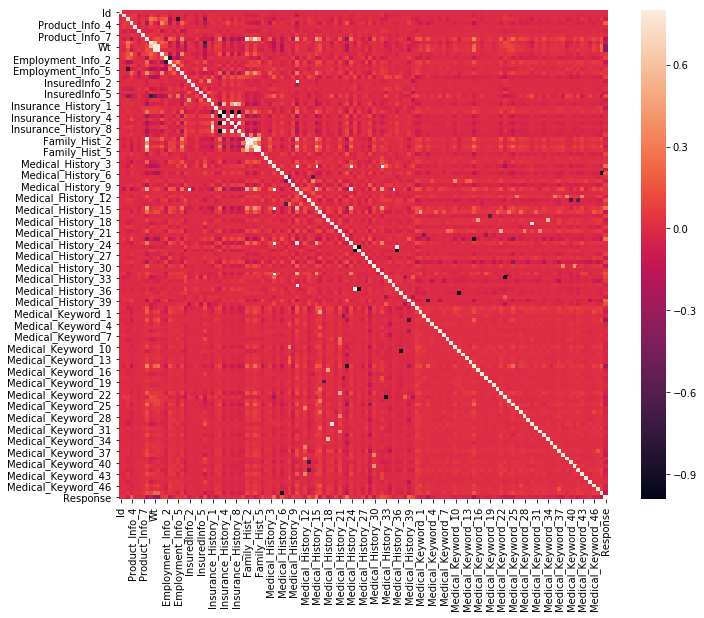

In [8]:
#correlation matrix
corrmat = df_train.corr()
f,ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat,vmax=.8,square=True);

In [10]:
#Analyze missing data
draw_missing_data_table(df_train)

,Total,Percent
Medical_History_10,58824,0.990620
Medical_History_32,58274,0.981358
Medical_History_24,55580,0.935990
Medical_History_15,44596,0.751015
Family_Hist_5,41811,0.704114
Family_Hist_3,34241,0.576632
Family_Hist_2,28656,0.482579
Insurance_History_5,25396,0.427679
Family_Hist_4,19184,0.323066
Employment_Info_6,10854,0.182786


In [11]:
#keep original training data, then drop features with high missing rates
df_train_copy = df_train.copy()
df_train.drop(['Medical_History_10','Medical_History_32','Medical_History_24','Medical_History_15','Family_Hist_5','Family_Hist_3',
               'Family_Hist_2','Insurance_History_5','Family_Hist_4'],axis=1, inplace=True)


In [18]:
#convert categorical values
from sklearn.preprocessing import LabelEncoder
Enc=LabelEncoder()
df_train['Product_Info_2']=Enc.fit_transform(df_train['Product_Info_2'].values)

In [20]:
df_train.fillna(-1,inplace=True)

In [23]:
#feature importance
from sklearn.ensemble import RandomForestRegressor
X,y=df_train.drop(['Response'],axis=1),df_train['Response']
feature_names = np.array([' '.join([str(b),a]) for a,b in zip(X.columns, range(len(X.columns)))])
RF=RandomForestRegressor(n_estimators=100,random_state=101).fit(X,y)
importance=np.mean([tree.feature_importances_ for tree in RF.estimators_],axis=0)
std=np.std([tree.feature_importances_ for tree in RF.estimators_],axis=0)
indices=np.argsort(importance)
range_ = range(len(importance))

scores=[]
for i in indices:
    scores.append((round(importance[i],3),feature_names[i]))
print(sorted(scores,reverse=True))

[(0.179, '11 BMI'), (0.055, '8 Ins_Age'), (0.051, '0 Id'), (0.049, '4 Product_Info_4'), (0.049, '36 Medical_History_4'), (0.045, '53 Medical_History_23'), (0.041, '12 Employment_Info_1'), (0.039, '72 Medical_Keyword_3'), (0.036, '10 Wt'), (0.032, '34 Medical_History_2'), (0.031, '33 Medical_History_1'), (0.029, '17 Employment_Info_6'), (0.024, '9 Ht'), (0.024, '2 Product_Info_2'), (0.018, '20 InsuredInfo_3'), (0.014, '15 Employment_Info_4'), (0.014, '13 Employment_Info_2'), (0.01, '68 Medical_History_40'), (0.007, '44 Medical_History_13'), (0.007, '23 InsuredInfo_6'), (0.006, '59 Medical_History_30'), (0.006, '57 Medical_History_28'), (0.006, '37 Medical_History_5'), (0.006, '32 Family_Hist_1'), (0.006, '30 Insurance_History_8'), (0.006, '26 Insurance_History_2'), (0.006, '22 InsuredInfo_5'), (0.006, '18 InsuredInfo_1'), (0.005, '69 Medical_History_41'), (0.005, '50 Medical_History_20'), (0.005, '48 Medical_History_18'), (0.005, '41 Medical_History_9'), (0.005, '3 Product_Info_3'), (0.